## Modelo polinómicos múltiple

Utilizando el dataframe adjunto denominado `datos_eco` que contiene información sobre diferentes variables socioeconómicas de España tratar de explicar el índice de precios al consumo (`precio_indice`) de la economía española durante los dos últimos años 2024 y 2025 a partir de las <u>variables explicativas</u> `tipo_de_interes` y `tasa_desempleo`. Responder a las siguientes cuestiones:

1. Describir la base de datos presentada, ajustar un modelo de regresión lineal múltiple y analizar la correlación entre las variables previamente.
2. Realizar una interpretación de los coeficientes del modelo de regresión lineal estimado y explicar el método de Mínimos Cuadrados Ordinarios (MCO). Interpretar las métricas de rendimiento del modelo.
3. Evaluar e interpretar la prueba de significatividad individual y conjunta del modelo de regresión lineal estimado.
4. Realizar la diagnosis de los residuos del modelo de regresión lineal estimado justificando gráficamente la respuesta.
5. Estimar dos o tres modelos de regresión polinómicos utilizando diferentes grados y comparar los resultados con el modelo de regresión lineal.

In [ ]:
# Base de datos economía española
año = c(2025,2025,2025,2025,2025,2025,2025,2025,2025,2025,2025,2025,2024,2024,2024,2024,2024,2024,2024,2024,2024,2024,2024,2024)
mes = c(12,11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1)
tipo_de_interes = c(2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75)
tasa_desempleo = c(5.3,6.3,5.3,7.1,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1)
precio_indice = c(1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719)
df = data.frame(año, mes, tipo_de_interes, tasa_desempleo, precio_indice)

<div style="background-color:#5DADE2"><b>Apartado 1</b></div>

In [ ]:
str(df)

'data.frame':	24 obs. of  5 variables:
 $ año            : num  2025 2025 2025 2025 2025 ...
 $ mes            : num  12 11 10 9 8 7 6 5 4 3 ...
 $ tipo_de_interes: num  2.75 2.5 2.5 2.5 2.5 2.5 2.5 2.25 2.25 2.25 ...
 $ tasa_desempleo : num  5.3 6.3 5.3 7.1 5.4 5.6 5.5 5.5 5.5 5.6 ...
 $ precio_indice  : num  1464 1394 1357 1293 1256 ...


#### Contextualización de la base de datos

La base de datos analizada es una **serie temporal mensual** compuesta por **24 observaciones**, correspondientes a distintos meses de los años **2024 y 2025**. Cada observación representa información **agregada a nivel temporal**, no individual, por lo que las interpretaciones deben entenderse en términos de **evolución macroeconómica y financiera en el tiempo**.

### Variables incluidas

- **`año`**: año natural al que corresponde la observación.
- **`mes`**: mes del año (1–12), que junto con la variable `año` permite ordenar cronológicamente la serie.
- **`tipo_de_interes`**: tipo de interés oficial, expresado en porcentaje, que refleja la política monetaria vigente en cada periodo.
- **`tasa_desempleo`**: tasa de desempleo mensual, medida como porcentaje de la población activa.
- **`precio_indice`**: valor de un índice de precios o bursátil, que actúa como **variable principal de interés** en los análisis posteriores.



In [ ]:
zdata <- df[, c("año", "mes", "tipo_de_interes", "tasa_desempleo", "precio_indice")]
# Visualizamos la base de datos seleccionada
head(zdata)

,año,mes,tipo_de_interes,tasa_desempleo,precio_indice
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2025,12,2.75,5.3,1464
2,2025,11,2.50,6.3,1394
3,2025,10,2.50,5.3,1357
4,2025,9,2.50,7.1,1293
5,2025,8,2.50,5.4,1256
6,2025,7,2.50,5.6,1254


In [ ]:
# Comprobamos si existen datos NAs para en caso afirmativo, eliminarlos y que no nos den problemas
wdata=na.omit(zdata)
# Podemos comprobar como NO existen datos missing
nrow(zdata) # Base de datos inicial
nrow(wdata) # Base de datos tras el na.omit

[1] 24

[1] 24

como se aprecia no hay datos faltantes

In [ ]:
str(zdata)

'data.frame':	24 obs. of  5 variables:
 $ año            : num  2025 2025 2025 2025 2025 ...
 $ mes            : num  12 11 10 9 8 7 6 5 4 3 ...
 $ tipo_de_interes: num  2.75 2.5 2.5 2.5 2.5 2.5 2.5 2.25 2.25 2.25 ...
 $ tasa_desempleo : num  5.3 6.3 5.3 7.1 5.4 5.6 5.5 5.5 5.5 5.6 ...
 $ precio_indice  : num  1464 1394 1357 1293 1256 ...


In [ ]:
# Realizamos el análisis exploratorio de las variables utilizadas
summary(wdata)

      año            mes        tipo_de_interes tasa_desempleo 
 Min.   :2024   Min.   : 1.00   Min.   :1.750   Min.   :5.300  
 1st Qu.:2024   1st Qu.: 3.75   1st Qu.:1.750   1st Qu.:5.575  
 Median :2024   Median : 6.50   Median :2.000   Median :5.900  
 Mean   :2024   Mean   : 6.50   Mean   :2.073   Mean   :5.892  
 3rd Qu.:2025   3rd Qu.: 9.25   3rd Qu.:2.500   3rd Qu.:6.100  
 Max.   :2025   Max.   :12.00   Max.   :2.750   Max.   :7.100  
 precio_indice   
 Min.   : 704.0  
 1st Qu.: 928.2  
 Median :1061.0  
 Mean   :1070.1  
 3rd Qu.:1239.0  
 Max.   :1464.0  

In [ ]:
# Cargar librería necesaria para kurtosis
if(!require(moments, quietly = TRUE)){
  install.packages("moments", repos = "https://cloud.r-project.org")
  library(moments)
}

# Desviación estándar de todas las variables numéricas
sapply(wdata, sd, na.rm = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



año             mes tipo_de_interes  tasa_desempleo   precio_indice 
      0.5107539       3.5262987       0.3495274       0.4042348     210.7353413

In [ ]:
# Curtosis de todas las variables numéricas
sapply(wdata, kurtosis, na.rm = TRUE)

año             mes tipo_de_interes  tasa_desempleo   precio_indice 
       1.000000        1.783217        1.618425        4.394399        2.069145

**<u>Interpretación resultados</u>.-**

La base de datos recoge una **serie temporal mensual** correspondiente a los años **2024 y 2025**, compuesta por **24 observaciones** y cinco variables de carácter macroeconómico y financiero. Al tratarse de datos agregados en el tiempo, las interpretaciones se realizan desde una perspectiva **temporal**, analizando la variabilidad y el comportamiento global de cada indicador.

La variable **`año`** presenta una media y mediana iguales a 2024, con una desviación estándar reducida (≈ 0.51), lo que refleja que la muestra se concentra en dos años consecutivos. Su curtosis es cercana a 1, coherente con una variable prácticamente discreta y sin interés analítico directo más allá de la indexación temporal.

La variable **`mes`** cubre todo el rango anual (1–12), con una media y mediana de 6.5, indicando una distribución temporal equilibrada de las observaciones a lo largo del año. La desviación estándar (≈ 3.53) es consistente con una cobertura uniforme de los meses, sin acumulaciones excesivas en periodos concretos.

El **`tipo_de_interes`** oscila entre **1.75 % y 2.75 %**, con una media de aproximadamente **2.07 %** y una mediana de **2.0 %**. La desviación estándar es relativamente baja (≈ 0.35), lo que indica una **variabilidad moderada** y una política monetaria relativamente estable durante el periodo analizado. La curtosis (~ 1.62) sugiere una distribución ligeramente aplanada, sin valores extremos ni episodios de volatilidad abrupta en los tipos de interés.

La **`tasa_desempleo`** presenta valores entre **5.3 % y 7.1 %**, con una media cercana al **5.9 %**. La desviación estándar (≈ 0.40) indica fluctuaciones moderadas en el mercado laboral. Sin embargo, la curtosis elevada (~ 4.39) apunta a una distribución más leptocúrtica, lo que sugiere la presencia de concentraciones alrededor de ciertos niveles de desempleo y posibles episodios puntuales de mayor tensión laboral.

Por último, el **`precio_indice`** muestra el mayor grado de variabilidad del conjunto. Sus valores oscilan entre **704 y 1464**, con una media de **1070** y una desviación estándar elevada (≈ 210.7). Esto refleja una **volatilidad considerable** del índice a lo largo del periodo analizado. La curtosis (~ 2.07) indica una distribución relativamente cercana a la normal, sin colas extremadamente pesadas, aunque con oscilaciones amplias en el nivel del índice.

En conjunto, los estadísticos descriptivos muestran un entorno macroeconómico caracterizado por **estabilidad relativa en tipos de interés**, **fluctuaciones moderadas en el desempleo** y **mayor volatilidad en el índice de precios**, lo que sugiere que esta última variable podría ser especialmente sensible a cambios económicos y monetarios. Estos resultados justifican el uso de modelos que tengan en cuenta la **dependencia temporal** y las posibles relaciones dinámicas entre las variables.


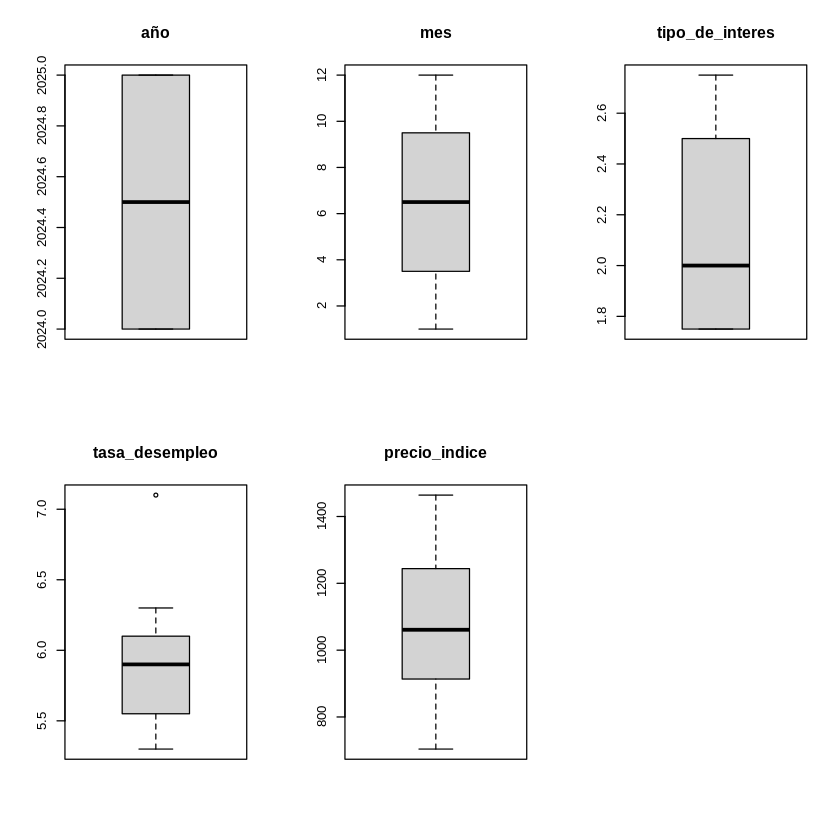

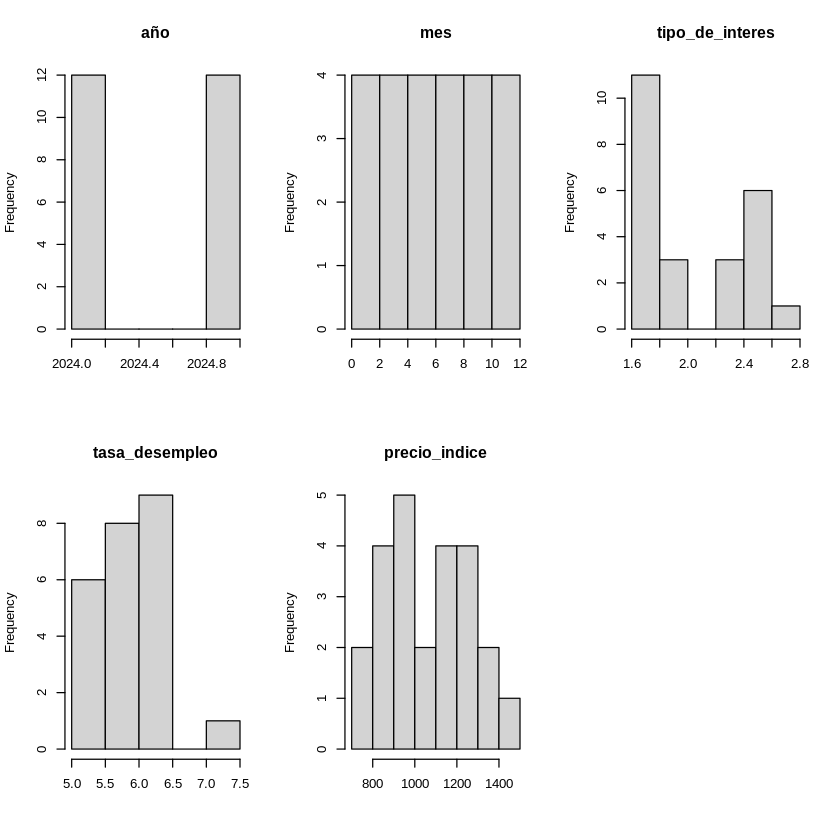

In [ ]:
# Seleccionar solo las variables numéricas
numeric_vars <- wdata[, sapply(wdata, is.numeric)]

# ---------- BOXPLOTS AUTOMÁTICOS ----------
par(mfrow = c(2, ceiling(ncol(numeric_vars)/2)))
for(i in 1:ncol(numeric_vars)){
  boxplot(numeric_vars[, i], main = colnames(numeric_vars)[i])
}

# ---------- HISTOGRAMAS AUTOMÁTICOS ----------
par(mfrow = c(2, ceiling(ncol(numeric_vars)/2)))
for(i in 1:ncol(numeric_vars)){
  hist(numeric_vars[, i], main = colnames(numeric_vars)[i], xlab = "")
}

# Volver a la configuración normal
par(mfrow = c(1,1))


**<u>Interpretación resultados</u>.-**

Los **boxplots** y **histogramas** permiten analizar de forma conjunta la **distribución**, **dispersión** y **forma** de las variables macroeconómicas incluidas en la serie temporal: *tipo_de_interes*, *tasa_desempleo* y *precio_indice*, así como las variables temporales *año* y *mes*. Este análisis gráfico complementa los estadísticos descriptivos y facilita la detección de asimetrías, variabilidad y posibles valores atípicos.

**Análisis de dispersión y valores extremos**

A partir de los **boxplots**, se observa un comportamiento diferenciado entre las variables:

- **`año`** presenta una dispersión mínima, consistente con el hecho de que la serie se concentra en dos años consecutivos (2024 y 2025). Su variabilidad carece de interés analítico propio y actúa únicamente como referencia temporal.
- **`mes`** muestra una distribución equilibrada a lo largo del rango 1–12, sin valores atípicos, lo que confirma una cobertura homogénea de los meses en la muestra.
- El **`tipo_de_interes`** presenta una dispersión moderada, con valores concentrados principalmente entre el 1.75 % y el 2.75 %. No se observan outliers, lo que sugiere una política monetaria relativamente estable durante el periodo analizado.
- La **`tasa_desempleo`** exhibe una dispersión contenida, aunque se identifica al menos un valor atípico en la parte superior, correspondiente a un mes con un nivel de desempleo significativamente más elevado que el resto. Esto apunta a episodios puntuales de tensión en el mercado laboral.
- El **`precio_indice`** es la variable con mayor dispersión, reflejando una elevada volatilidad del índice a lo largo del tiempo, aunque sin presencia clara de valores extremos aislados.

**Forma de las distribuciones**

Los **histogramas** refuerzan las observaciones anteriores:

- **`año`** y **`mes`** presentan distribuciones discretas y prácticamente uniformes, coherentes con su naturaleza temporal.
- El **`tipo_de_interes`** muestra una distribución ligeramente asimétrica, con acumulación en torno a valores bajos y medios, consistente con cambios graduales en los tipos.
- La **`tasa_desempleo`** presenta una distribución más concentrada, con ligera asimetría a la derecha, influida por los meses con mayores niveles de desempleo.
- El **`precio_indice`** presenta una distribución más amplia y continua, con una dispersión notable, lo que evidencia movimientos significativos del índice durante el periodo considerado.

**Conclusión**

En conjunto, los gráficos revelan un entorno caracterizado por **estabilidad relativa en los tipos de interés**, **fluctuaciones moderadas en el desempleo** y una **alta volatilidad en el índice de precios**. Estas diferencias estructurales entre variables justifican el uso de modelos que tengan en cuenta la **dependencia temporal** y sugieren que el *precio_indice* será especialmente sensible a cambios en las condiciones macroeconómicas. Asimismo, la presencia puntual de valores atípicos en el desempleo aconseja cautela en modelos que asuman normalidad o homocedasticidad.


Antes de proceder con la estimación del modelo de lineal entre las variables de interés,
es necesario comprobar que existe una relación significativa entre ellas.
Si no se cumple esta condición, no sería adecuado aplicar técnicas de regresión,
ya que el modelo carecería de validez explicativa.  

Para llevar a cabo esta verificación se considerarán tres enfoques complementarios:

1. **Evidencia gráfica**: análisis visual de la relación entre las variables mediante representaciones gráficas.  
2. **Evidencia estadística**: contraste formal de hipótesis que evalúe la existencia y significación de la relación.  
3. **Evidencia numérica**: estudio de indicadores descriptivos que permitan cuantificar la fuerza y dirección de la asociación.  

**Evidencia Gráfica**
El análisis gráfico es una herramienta fundamental para explorar la relación entre las
variables del modelo. En particular, el gráfico de dispersión (scatter plot) permite
visualizar la forma y la intensidad de la relación entre la variable dependiente
y cada una de las variables independientes.

Este tipo de representación facilita la detección de:
- Patrones de asociación (positivos, negativos o nulos).
- Relación lineal o no lineal.
- Posibles outliers.
- Estructuras no esperadas que podrían afectar al ajuste del modelo.

El gráfico de dispersión es especialmente útil para validar visualmente las supo-
siciones iniciales sobre la naturaleza de las relaciones entre las variables.

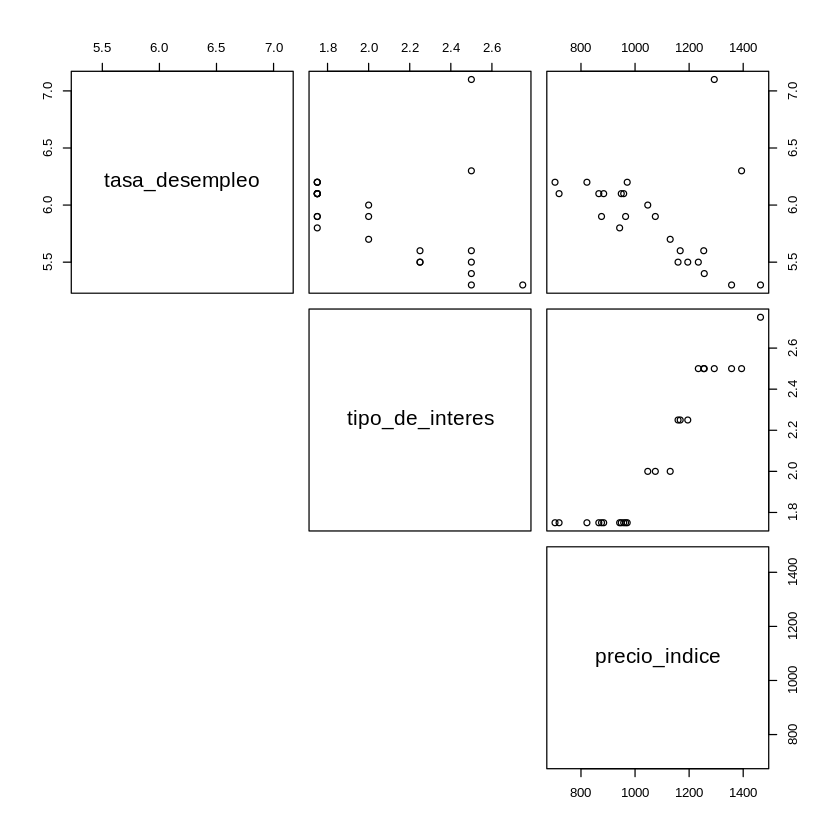

In [ ]:
wdata <- wdata[, c("tasa_desempleo", "tipo_de_interes", "precio_indice")]
# Evidencia gráfica a través del gráfico de dispersión
pairs(wdata, lower.panel = NULL)

**<u>Interpretación resultados</u>.-**

La matriz de **gráficos de dispersión** permite explorar visualmente las **relaciones bivariantes** entre *tasa_desempleo*, *tipo_de_interes* y *precio_indice*. En todos los paneles se observa que los puntos **no se distribuyen de forma completamente aleatoria**, lo que sugiere la existencia de **dependencias estructurales** entre las variables.

En particular, se aprecia una **relación negativa entre la tasa de desempleo y el precio del índice**, de modo que valores más elevados de desempleo tienden a asociarse con niveles más bajos del índice. Este patrón es consistente con un contexto macroeconómico en el que un deterioro del mercado laboral se refleja en una menor valoración de los activos.

Asimismo, la relación entre el **tipo de interés y el precio del índice** muestra una tendencia también negativa: incrementos en los tipos de interés parecen coincidir con reducciones en el nivel del índice, lo que es coherente con el efecto contractivo de una política monetaria más restrictiva sobre los mercados financieros.

La relación entre **tipo de interés y tasa de desempleo** es menos marcada visualmente, aunque se intuye una asociación positiva débil, compatible con escenarios en los que subidas de tipos se producen en entornos de mayor presión sobre el mercado laboral.

No obstante, este análisis es **exploratorio** y puramente descriptivo. La evidencia gráfica, aunque informativa, **no permite establecer relaciones causales ni cuantificar la intensidad de las asociaciones observadas**. Por ello, resulta necesario complementar estos resultados con **medidas numéricas de correlación** y, en etapas posteriores, con **modelos estadísticos o de aprendizaje automático** que confirmen y caractericen formalmente dichas relaciones.


**Evidencia Numérica**
El **coeficiente de correlación de Pearson** es una medida estadística que permite
cuantificar la fuerza y la dirección de la relación lineal entre dos variables. Este
indicador proporciona una valoración numérica que complementa la evidencia gráfica y
ayuda a confirmar si existe una relación significativa entre las variables analizadas.
El coeficiente de Pearson toma valores en el rango de [−1, 1]:

- Un **valor cercano a 1** indica una **correlación positiva fuerte**, es decir, a medida
que una variable aumenta, la otra también aumenta.

- Un **valor cercano a -1** indica una **correlación negativa fuerte**, es decir, cuando
una variable aumenta, la otra disminuye.

- Un **valor cercano a 0** sugiere una **ausencia de relación lineal significativa** entre
las variables.

El análisis del coeficiente de correlación permite obtener evidencia numérica objetiva
sobre la existencia y la intensidad de las relaciones observadas, apoyando la interpretación
visual obtenida a partir de los gráficos de dispersión.

In [ ]:
# Evidencia numérica
cor(wdata)

,tasa_desempleo,tipo_de_interes,precio_indice
tasa_desempleo,1.0000000,-0.3878568,-0.3828851
tipo_de_interes,-0.3878568,1.0000000,0.9357932
precio_indice,-0.3828851,0.9357932,1.0000000


**<u>Interpretación resultados</u>.-**

La **matriz de correlaciones** permite cuantificar la **intensidad y el sentido de las relaciones lineales** entre *tasa_desempleo*, *tipo_de_interes* y *precio_indice*, complementando el análisis exploratorio previo basado en gráficos de dispersión.

Se observa una **correlación negativa moderada entre la tasa de desempleo y el tipo de interés** (-0.388). Este resultado sugiere que, en el periodo analizado, niveles más elevados de desempleo tienden a asociarse con tipos de interés más bajos, lo que es coherente con un contexto de política monetaria acomodaticia en respuesta a un mercado laboral más débil.

Asimismo, la **tasa de desempleo presenta una correlación negativa moderada con el precio del índice** (-0.383). Este patrón indica que incrementos en el desempleo suelen coincidir con descensos en el nivel del índice, reflejando un entorno económico menos favorable para los mercados financieros.

La relación más intensa se observa entre el **tipo de interés y el precio del índice**, con un coeficiente de **0.936**, lo que indica una **correlación positiva muy alta**. Este valor sugiere una fuerte asociación lineal entre ambas variables durante el periodo considerado, de modo que variaciones en los tipos de interés se acompañan de cambios significativos en el nivel del índice. No obstante, dada la elevada magnitud del coeficiente, es necesario interpretar esta relación con cautela, ya que puede estar influida por tendencias comunes o dependencia temporal.

En conjunto, los resultados indican que el **precio del índice está estrechamente vinculado al tipo de interés**, mientras que el desempleo mantiene relaciones inversas, aunque más moderadas, con ambas variables. Estas interdependencias sugieren la existencia de una **estructura macroeconómica coherente**, pero también ponen de manifiesto la necesidad de considerar posibles problemas de **multicolinealidad** y **no independencia temporal** en análisis posteriores, especialmente en modelos de regresión o predicción.


Además de la evidencia gráfica y numérica, es fundamental evaluar la **significancia
estadística** de la relación entre las variables. Para ello, se utiliza el **p-valor**, que indica
la probabilidad de que la correlación observada haya ocurrido por puro azar.

Un p-valor bajo sugiere que es poco probable que la relación observada sea fruto del
azar, mientras que un p-valor alto indica que no se puede descartar que la correlación se deba a la variabilidad aleatoria de los datos.
Por convención:

- Si el **p-valor $<0.05$**, se considera que la relación es **estadísticamente significativa**, es decir, existe suficiente evidencia para afirmar que la correlación entre las variables no es casual.

- Si el **p-valor $≥ 0.05$**, **no se puede concluir** que la relación sea significativa con el
nivel de confianza habitual.

In [ ]:
# Evidencia contrastada (variable crim)
cor.test(wdata$tipo_de_interes, wdata$precio_indice)


	Pearson's product-moment correlation

data:  wdata$tipo_de_interes and wdata$precio_indice
t = 12.45, df = 22, p-value = 1.954e-11
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8552498 0.9721916
sample estimates:
      cor 
0.9357932 


In [ ]:
# Evidencia contrastada (variable crim)
cor.test(wdata$tasa_desempleo, wdata$precio_indice)


	Pearson's product-moment correlation

data:  wdata$tasa_desempleo and wdata$precio_indice
t = -1.944, df = 22, p-value = 0.06479
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.68108509  0.02425843
sample estimates:
       cor 
-0.3828851 


**<u>Interpretación resultados</u>.-**

Se han realizado **contrastes de correlación de Pearson** con el objetivo de evaluar la **significación estadística** de las relaciones lineales entre el *precio_indice* y las variables macroeconómicas *tasa_desempleo* y *tipo_de_interes*. Este análisis permite complementar la información obtenida en la matriz de correlaciones y determinar si las asociaciones observadas son estadísticamente distintas de cero.

En primer lugar, la relación entre **`tasa_desempleo` y `precio_indice`** presenta un coeficiente de correlación **negativo moderado** ($r = -0.383$). El contraste de Pearson arroja un estadístico $t = -1.944$ con un **$p$-valor de 0.0648**, ligeramente superior al nivel de significación habitual $\alpha = 0.05$. Por tanto, **no se rechaza la hipótesis nula** de ausencia de correlación lineal al 5 %, aunque el resultado se sitúa cerca del umbral de significación. El intervalo de confianza al 95 % $[-0.681,\; 0.024]$ incluye el cero, lo que refleja cierta incertidumbre sobre la existencia de una relación lineal poblacional, si bien el signo negativo es coherente con la evidencia gráfica previa.

En segundo lugar, la relación entre **`tipo_de_interes` y `precio_indice`** es **positiva y muy intensa** ($r = 0.936$). El contraste produce un estadístico $t = 12.45$ y un **$p$-valor extremadamente pequeño** ($p \approx 1.95 \times 10^{-11}$), lo que conduce a un **rechazo claro de la hipótesis nula**. El intervalo de confianza al 95 % $[0.855,\; 0.972]$ confirma que la correlación poblacional es positiva y de gran magnitud, con una elevada precisión en la estimación.

En conjunto, los contrastes indican que el **precio del índice mantiene una relación lineal estadísticamente significativa y muy fuerte con el tipo de interés**, mientras que la relación con la tasa de desempleo es **más débil y no concluyente** al nivel de significación estándar. Estos resultados sugieren que, en el periodo analizado, la evolución del índice está más estrechamente asociada a la política monetaria que a las fluctuaciones del mercado laboral. No obstante, la proximidad del $p$-valor al umbral en el caso del desempleo aconseja cautela y justifica un análisis posterior mediante **modelos multivariantes o dinámicos** que tengan en cuenta la dependencia temporal entre observaciones.


<div style="background-color:#5DADE2"><b>Apartado 2</b></div>

**Método de Mínimos Cuadrados Ordinarios (MCO)**

El **método de Mínimos Cuadrados Ordinarios (MCO)** es la técnica estándar para estimar los parámetros de un **modelo de regresión lineal**, ya que permite cuantificar la relación entre una variable dependiente y una o varias variables explicativas de forma rigurosa y eficiente.

Sea el modelo de regresión lineal múltiple:

$$
y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_k x_{ik} + \varepsilon_i,
$$

donde $y_i$representa la variable dependiente, $x_{ij}$ las variables explicativas, $\beta_0, \dots, \beta_k$ los parámetros desconocidos y $varepsilon_i$ el término de error que recoge los factores no observados.

El principio fundamental del MCO consiste en **elegir los coeficientes del modelo de manera que se minimice la suma de los cuadrados de los residuos**, definidos como la diferencia entre el valor observado y el valor predicho:

$$
e_i = y_i - \hat{y}_i.
$$

Formalmente, el problema de optimización es:

$$
\min_{\beta_0,\dots,\beta_k} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2.
$$

Este criterio penaliza de forma más severa los errores grandes y garantiza una solución única y analítica bajo condiciones estándar.




Como se indica se realizará un **modelo de regresión lineal**. Este modelo permite establecer una relación directa y cuantificable entre la variable objetivo y las variables predictoras, facilitando así la comprensión de cómo cada factor influye en la predicción.

La ecuación del modelo lineal es:

$
\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p + \varepsilon ;\quad i=1,\dots,p\\
$

donde:

- $\hat{y}$: es la predicción o el valor estimado de la variable objetivo (en nuestro caso sería la variable (`medv`)).  
- $\beta_0$: es el intercepto o término constante, que representa el valor esperado de $\hat{y}$ cuando todas las variables $x_i$ son cero.  
- $\beta_1, \beta_2, \ldots, \beta_p$: son los coeficientes que indican la influencia de cada variable explicativa $x_1, x_2, \ldots, x_p$ sobre la variable objetivo.  
- $x_1, x_2, \ldots, x_p$: son las variables independientes o explicativas.  
- $\varepsilon$: es el término de error o residual, que representa la variabilidad no explicada por el modelo.  

Ya que se intentará predecir la variable (`precio_indice`) con múltiples  variables eso lo convierte en un Modelo de Regresión Lineal Múltiple (MRLM) reduciendo la ecuación a la siguiente:

\begin{align*}
medv_{i}&=\beta_{0}+\beta_{1}*tasa desempleo_{i}+\beta_{2}*tipo de interes_{i}+\epsilon_{i} \quad i=1,\dots,n\\
\end{align*}


In [ ]:
# Estimación del modelo de regresión lineal múltiple incluyendo el dataset como parámetro
modelo <- lm(precio_indice ~ tasa_desempleo + tipo_de_interes, data = wdata)
modelo


Call:
lm(formula = precio_indice ~ tasa_desempleo + tipo_de_interes, 
    data = wdata)

Coefficients:
    (Intercept)   tasa_desempleo  tipo_de_interes  
         -16.03           -12.23           558.72  


**<u>Interpretación resultados</u>.-**

Se ha estimado un **modelo de regresión lineal múltiple** con el objetivo de explicar el comportamiento del **precio del índice (`precio_indice`)** en función de dos variables macroeconómicas: la **tasa de desempleo (`tasa_desempleo`)** y el **tipo de interés (`tipo_de_interes`)**. Los coeficientes estimados permiten analizar el **efecto parcial** de cada variable, manteniendo constante la otra.

Los parámetros estimados del modelo son:

- Intercepto: $\beta_0 = -16.03$  
- `tasa_desempleo`: $\beta_1 = -12.23$  
- `tipo_de_interes`: $\beta_2 = 558.72$  

La interpretación de los coeficientes es la siguiente:

- **Intercepto ($\beta_0 = -16.03$):** representa el valor esperado del índice cuando tanto la tasa de desempleo como el tipo de interés toman valor cero. Dado que este escenario **no es realista desde el punto de vista económico**, el intercepto debe interpretarse únicamente como un término de ajuste necesario para el modelo y no como un valor con significado sustantivo.

- **Tasa de desempleo (`tasa_desempleo`, $\beta_1 = -12.23$):** manteniendo constante el tipo de interés, **un aumento de un punto porcentual en la tasa de desempleo se asocia con una disminución media de aproximadamente 12.23 unidades en el precio del índice**. El signo negativo es coherente con la intuición económica, ya que un deterioro del mercado laboral suele reflejar un entorno menos favorable para los mercados financieros.

- **Tipo de interés (`tipo_de_interes`, $\beta_2 = 558.72$):** manteniendo constante la tasa de desempleo, **un incremento de un punto porcentual en el tipo de interés se asocia con un aumento medio de aproximadamente 558.7 unidades en el precio del índice**. Este efecto positivo es de gran magnitud y consistente con la fuerte asociación observada en los análisis de correlación, aunque debe interpretarse con cautela debido a la posible influencia de tendencias comunes y dependencia temporal.

En conjunto, el modelo sugiere que el **precio del índice está fuertemente condicionado por el tipo de interés**, mientras que la tasa de desempleo ejerce un efecto negativo más moderado. No obstante, dada la **elevada correlación entre el tipo de interés y el precio del índice**, así como el carácter temporal de los datos, es necesario ser prudente en la interpretación causal de los coeficientes. Estos resultados justifican la realización de análisis adicionales, como la evaluación de **significación estadística de los coeficientes**, el estudio de **multicolinealidad** y la posible extensión a **modelos dinámicos** que tengan en cuenta la dependencia temporal.


In [ ]:
# Información de salida del modelo de regresión estimado
str(modelo)

List of 12
 $ coefficients : Named num [1:3] -16 -12.2 558.7
  ..- attr(*, "names")= chr [1:3] "(Intercept)" "tasa_desempleo" "tipo_de_interes"
 $ residuals    : Named num [1:24] 8.382 90.292 41.061 -0.924 -58.716 ...
  ..- attr(*, "names")= chr [1:24] "1" "2" "3" "4" ...
 $ effects      : Named num [1:24] -5242.3 387 -863.2 -65.7 -54.2 ...
  ..- attr(*, "names")= chr [1:24] "(Intercept)" "tasa_desempleo" "tipo_de_interes" "" ...
 $ rank         : int 3
 $ fitted.values: Named num [1:24] 1456 1304 1316 1294 1315 ...
  ..- attr(*, "names")= chr [1:24] "1" "2" "3" "4" ...
 $ assign       : int [1:3] 0 1 2
 $ qr           :List of 5
  ..$ qr   : num [1:24, 1:3] -4.899 0.204 0.204 0.204 0.204 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:24] "1" "2" "3" "4" ...
  .. .. ..$ : chr [1:3] "(Intercept)" "tasa_desempleo" "tipo_de_interes"
  .. ..- attr(*, "assign")= int [1:3] 0 1 2
  ..$ qraux: num [1:3] 1.2 1.26 1.16
  ..$ pivot: int [1:3] 1 2 3
  ..$ tol  : num 1e-07
  ..$ ra

**<u>Estructura del str `lm`</u>.-**


Como se aprecia al aplicar `str()` a un modelo `lm` contiene 12 elementos principales:

- **coefficients**: coeficientes estimados de la regresión (intercepto y pendientes).  

- **residuals**: diferencias entre los valores observados y los valores ajustados.  

- **effects**: cantidades utilizadas en el proceso de estimación (incluyen términos ortogonalizados).  

- **rank**: rango del modelo, que indica el número de parámetros estimados.  

- **fitted.values**: valores predichos por el modelo para cada observación.  

- **assign**: relación entre cada coeficiente y el término de la fórmula (intercepto, variables, etc.).

- **qr**: descomposición QR de la matriz de diseño, utilizada internamente para calcular los estimadores.  

- **df.residual**: grados de libertad asociados a los residuos del modelo.

- **xlevels**: niveles de las variables categóricas incluidas en la fórmula (vacío si no hay factores).

- **call**: llamada original de la función `lm()` con la fórmula y los datos utilizados.  

- **terms**: objeto que describe la fórmula del modelo y la información asociada a las variables.  

- **model**: data frame con las variables efectivamente empleadas en la regresión.  



In [ ]:
# Aplicamos la función summary para obtener los principales resultados del modelo de regresión lineal
output <- summary(modelo)
output


Call:
lm(formula = precio_indice ~ tasa_desempleo + tipo_de_interes, 
    data = wdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-181.893  -30.404    3.729   54.632   98.312 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -16.03     311.82  -0.051    0.959    
tasa_desempleo    -12.23      43.43  -0.282    0.781    
tipo_de_interes   558.72      50.23  11.124 2.91e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 77.61 on 21 degrees of freedom
Multiple R-squared:  0.8762,	Adjusted R-squared:  0.8644 
F-statistic:  74.3 on 2 and 21 DF,  p-value: 2.981e-10


**<u>Interpretación resultados</u>.-**

El resultado de `summary()` del **modelo de regresión lineal múltiple** permite evaluar la **significatividad individual de los coeficientes**, así como el **grado de ajuste global** del modelo que explica el **precio del índice (`precio_indice`)** en función de la **tasa de desempleo** y el **tipo de interés**.

Los **coeficientes estimados** del modelo son:
$$
\hat{\beta}_0 = -16.03,\quad
\hat{\beta}_1 = -12.23\;(\texttt{tasa_desempleo}),\quad
\hat{\beta}_2 = 558.72\;(\texttt{tipo_de_interes}).
$$

La columna **`Std. Error`** recoge la incertidumbre asociada a cada estimador, a partir de la cual se calculan los **estadísticos t**, utilizados para contrastar la hipótesis nula individual $H_0:\beta_j = 0$.

- **Intercepto**: el coeficiente no resulta estadísticamente significativo ($p = 0.959$). Su interpretación económica es limitada, ya que representa el valor esperado del índice cuando las variables explicativas son cero, un escenario poco realista. Su función principal es actuar como término de ajuste del modelo.

- **Tasa de desempleo (`tasa_desempleo`)**: presenta un coeficiente negativo, pero **no significativo** ($p = 0.781$). Esto indica que, una vez controlado el tipo de interés, **no existe evidencia estadística suficiente** para afirmar que la tasa de desempleo tenga un efecto lineal independiente sobre el precio del índice en este modelo.

- **Tipo de interés (`tipo_de_interes`)**: muestra un coeficiente **positivo y altamente significativo** ($p = 2.91 \times 10^{-10}$). En términos interpretativos, **un aumento de una unidad en el tipo de interés se asocia con un incremento medio de 558.72 unidades en el precio del índice**, manteniendo constante la tasa de desempleo. Este resultado indica que el tipo de interés es el **principal determinante del modelo**.

En cuanto a los **residuos**, la desviación estándar residual es de **77.61 unidades**, lo que representa el error típico de predicción del modelo. La mediana cercana a cero sugiere ausencia de sesgo sistemático, aunque se observan residuos relativamente grandes en los extremos.

Respecto al **ajuste global**, el coeficiente de determinación es \(R^2 = 0.876\) y el \(R^2\) ajustado es \(0.864\), lo que implica que aproximadamente **el 86–88 % de la variabilidad del precio del índice es explicada por el modelo**. El **contraste global F** ($F = 74.3$, $p = 2.98 \times 10^{-10}$) permite **rechazar la hipótesis nula de significatividad conjunta**, confirmando que el modelo es globalmente significativo.

En conjunto, el modelo evidencia que **el tipo de interés ejerce un efecto dominante y estadísticamente significativo sobre el precio del índice**, mientras que la tasa de desempleo no aporta información explicativa adicional una vez incluido el tipo de interés. Esto sugiere que el comportamiento del índice está principalmente condicionado por variables financieras más que por indicadores del mercado laboral en este contexto.

**Ecuación del modelo de regresión lineal múltiple**

$$
\widehat{precio\_indice}_i
= -16.03
- 12.23 \cdot tasa\_desempleo_i
+ 558.72 \cdot tipo\_de\_interes_i
+ \hat{\varepsilon}_i,
\qquad i = 1,\dots,n.
$$


Ahora se procederá a obtener valores específicos del `output` empezando con **los coeficientes de regresión $\hat{\beta}=(\hat{\beta}_{0},\hat{\beta}_{1})$** se obtendrá la estimación  de forma **directa** a partir del `output`.

In [ ]:
# Extracción directa de los coeficientes de regresión (utilizamos output NO modelo)
output$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-16.03418,311.82104,-0.0514211,9.594760e-01
tasa_desempleo,-12.23047,43.43068,-0.2816089,7.809997e-01
tipo_de_interes,558.71775,50.22837,11.1235483,2.909934e-10


A continuación se procede a **extraer los valores ajustados** de la variable dependiente a partir del `modelo`  en vez del `output`.

In [ ]:
# Extracción directa de los valores ajustados de la variable dependiente
head(modelo$fitted.values)

1        2        3        4        5        6 
1455.618 1303.708 1315.939 1293.924 1314.716 1312.270

**<u>Interpretación de resultados</u>.-**  
Los **valores ajustados** corresponden a las **estimaciones puntuales de la variable dependiente** que se obtienen al aplicar la ecuación de regresión lineal sobre los datos observados de la variable explicativa. En este sentido, constituyen la **proyección del modelo sobre el espacio muestral**.

Se procede a **extraer los residuos estimados (representan la diferencia entre los valores observados de la variable dependiente) $\hat{\epsilon}$** a partir del `modelo`.  

In [ ]:
# Extracción directa del valor de los residuos estimados
head(modelo$residuals)

1           2           3           4           5           6 
  8.3818298  90.2917334  41.0612679  -0.9238941 -58.7156856 -58.2695925

Se procede a **los grados de libertad**(refleja la diferencia entre el número de observaciones utilizadas en la estimación del modelo (correspondientes a los valores de la variable dependiente `precio_indice`) y el número de parámetros que se han ajustado, incluyendo la constante) a partir del `output`.

In [ ]:
# Extracción directa del valor de los grados de libertad (utilizamos output NO modelo)
head(output$df)[2]

[1] 21

Se procede a **obtener la suma de cuadrados de los residuos** a través de la suma de cuadrados de los residuos denotado por $SSR$ o $\hat{\sigma}$ utilizando el `output`.

In [ ]:
# Extracción directa de la suma de cuadrados de los residuos (utilizamos output NO modelo)
head(output$sigma)

[1] 77.6056

La **extracción de los errores de los parámetros estimados** se obtendran a partir de los errores estándar asociados a los coeficientes de regresión $\hat{\beta}=(\hat{\beta}_{0},\hat{\beta}_{1})$ utilizando el objeto `output`.

In [ ]:
# Extracción directa de los errores de los coeficientes de regresión (utilizamos output NO modelo)
output$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-16.03418,311.82104,-0.0514211,9.594760e-01
tasa_desempleo,-12.23047,43.43068,-0.2816089,7.809997e-01
tipo_de_interes,558.71775,50.22837,11.1235483,2.909934e-10


La **extracción de los coeficientes de determinación** estimados a partir del objeto `output`

In [ ]:
# Extracción directa del valor de los coeficientes de determinación
# Obtenemos R2 (utilizamos output NO modelo)
R2=output$r.squared
R2

[1] 0.8761766

A pesar de la utilidad del coeficiente de determinación $R^2$ para evaluar el ajuste del modelo, este presenta una limitación importante: su valor tiende a aumentar con la incorporación de nuevas variables independientes, incluso cuando estas no aportan información relevante. Con el fin de corregir este sesgo, se emplea el coeficiente de determinación ajustado $R^2_{adj}$, que introduce una penalización por la inclusión de variables adicionales y proporciona una medida más realista del poder explicativo del modelo.

**[`Coeficiente de determinación ajustado`]** Como se está estudiando un modelo con varias  variables independientes, la diferencia entre $R^2$ y $R^2_{adj}$ será impportante,por lo que se realizará para mayor profundidad. La ecuación de $R^2_{adj}$ sería la siguiente:

\begin{align*}
R_{adj}^2 = 1 - \left( {1 - {R^2}} \right)\frac{{n-1}}{{n-k}}
\end{align*}

siendo $n$ el número de obervaciones totales y $k$ el número de parámetros estimados. En la ecuación se puede observar que el parámetro $k$ se encuentra en el denominador,por lo que disminuye el valor alcanzado por $R^2_{adj}$ a medida que se incorpore una nueva variable independiente.

Al igual que con los otros parámetros se obtendrá **Directamente del `output`**.


In [ ]:
# Obtenemos R2 ajustado directamente del output (NO del modelo)
R2adj = output$adj.r.squared
R2adj

[1] 0.8643838

<u>Interpretación resultados</u>.-
Al comparar los resultados obtenidos para el coeficiente de determinación, se observa que el valor de $R^2$ es $0.87$, mientras que el coeficiente de determinación ajustado $R^2_{adj}$ alcanza un valor ligeramente inferior de $0.86$. Esta diferencia, aunque pequeña, refleja el ajuste que introduce $R^2_{adj}$ al considerar el número de parámetros estimados en el modelo.

En este caso particular, donde se analizan conjuntamente las variables explicativas `tipo_de_interes` y `tasa_desempleo`para explicar la variable dependiente `precio_indice`, ambos valores son muy similares. Sin embargo, la comparación pone de manifiesto que, en modelos con varias variables independientes, el uso de $R^2_{adj}$ resulta más adecuado para evaluar el verdadero poder explicativo del modelo, evitando la sobrestimación del ajuste que puede presentar el $R^2$ clásico.

Se procede a **extraer los intervalos de confianza** mediante la **función** $\tt confint$ aplicada sobre el `modelo`. Para elegir el intervalo deseado se utiliza el parámetro `level` (por defecto $0.95$).

Los intervalos de confianza representan el rango dentro del cual se espera que se encuentre el valor real de un parámetro con un determinado nivel de confianza.

In [ ]:
# Extracción de los intervalos de confianza para los coeficientes de regresión con la función `confint`
# Ejemplo para un nivel de confianza del 95%
ci.bhat <- confint(modelo)
ci.bhat

,2.5 %,97.5 %
(Intercept),-664.5015,632.43317
tasa_desempleo,-102.5495,78.08857
tipo_de_interes,454.2621,663.17338


<div style="background-color:#5DADE2"><b>Apartado 3</b></div>

Por último se **extraer el estadístico F y su p-valor** mediante la **función** $\tt anova$ sobre el `modelo`

El **estadístico F** es una medida utilizada en los modelos de regresión para contrastar la **significatividad conjunta de los parámetros**. Se construye como el cociente entre la variabilidad explicada por el modelo y la variabilidad no explicada (residuos), ajustadas por sus grados de libertad. Un valor elevado del estadístico F indica que el modelo explica una parte significativa de la variabilidad de la variable dependiente en comparación con la variabilidad atribuible al azar.  

El **p-valor asociado al estadístico F** expresa la probabilidad de obtener un valor del estadístico al menos tan extremo como el observado si la hipótesis nula fuera cierta, es decir, si todos los parámetros fueran nulos. Un p-valor bajo (habitualmente inferior al 5%) conduce al rechazo de la hipótesis nula, lo que implica que el modelo, en su conjunto, resulta significativo.


In [ ]:
# Obtenemos el estadístico F y su p-valor con la función 'anova'
anova.ols = anova(modelo)
anova.ols

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
tasa_desempleo,1,149740.6,149740.59,24.86299,6.191160e-05
tipo_de_interes,1,745200.0,745200.02,123.73333,2.909934e-10
Residuals,21,126475.2,6022.63,NA,NA


**<u>Interpretación resultados</u>.-**

La tabla ANOVA del modelo de regresión lineal permite evaluar tanto la **significatividad individual de cada variable explicativa** como la **significatividad conjunta del modelo**.

En primer lugar, la variable **`tasa_desempleo`** presenta un **estadístico F de 24.863** con un **p-valor de 6.19·10⁻⁵**, claramente inferior al nivel de significación habitual del 5%. Este resultado permite **rechazar la hipótesis nula** de que su coeficiente sea nulo, concluyendo que la tasa de desempleo tiene un **efecto estadísticamente significativo** sobre la variable dependiente, manteniendo constante el resto de variables del modelo.

Por su parte, la variable **`tipo_de_interes`** muestra un **estadístico F de 123.733** con un **p-valor de 2.91·10⁻¹⁰**, lo que evidencia una **significatividad estadística muy elevada**. Esto indica que el tipo de interés es un **factor altamente relevante** en la explicación de la variable dependiente, siendo además la variable con mayor capacidad explicativa individual dentro del modelo.

En cuanto a la **significatividad conjunta del modelo**, el contraste F global permite contrastar la hipótesis nula

$$
H_0:\ \beta_{\text{tasa_desempleo}} = \beta_{\text{tipo_de_interes}} = 0$$

frente a la alternativa de que al menos uno de los coeficientes sea distinto de cero. Dado que ambos coeficientes resultan estadísticamente significativos y que la inclusión conjunta de las variables reduce de forma sustancial la suma de cuadrados residual, se **rechaza la hipótesis nula**, concluyéndose que el modelo es **globalmente significativo**.

En consecuencia, tanto a nivel **individual** como **conjunto**, las variables incluidas presentan **capacidad explicativa estadísticamente significativa**, lo que respalda la adecuación del modelo de regresión lineal estimado.


<div style="background-color:#5DADE2"><b>Apartado 4</b></div>

Resulta necesario comprobar si el modelo seleccionado es realmente **adecuado** y no únicamente el menos desfavorable entre los comparados. Para ello, se procede a la **validación del modelo**, o **diagnóstico**, que se centra en el estudio detallado de los **residuos**.

Un modelo puede **considerarse válido** si cumple, **en su mayoría**, las siguientes condiciones, las cuales pueden evaluarse mediante diferentes representaciones gráficas obtenidas directamente del modelo:  


* **Aspectos vinculados al modelo [Gráfico 1]**: se debe verificar que la relación entre las variables es lineal. Por lo que se representa el gráfico de **residuos frente a valores ajustados** `(Residuals vs Fitted)`.  

* **Aspectos relacionados con los residuos [Gráficos 2-3]**: es necesario comprobar si los errores presentan distribución normal con media cero y varianza constante $σ^2$. Para ello se recurre, por un lado, al **Q-Q plot** que permite contrastar la normalidad de los residuos y, por otro, al gráfico de **valores ajustados frente a la raíz cuadrada de los residuos estandarizados** `(Fitted vs Square Standardized Residuals)`, que proporciona información sobre la homocedasticidad del modelo.  


* **Aspectos relativos a observaciones anómalas [Gráfico 4]**: se debe examinar si existen observaciones atípicas que puedan alterar la validez del modelo. Esto se lleva a cabo mediante el gráfico de **residuos frente al apalancamiento** `(Residuals vs Leverage)`, que permite identificar casos influyentes.  

* **Aspectos relativos a las variables independientes [Gráfico 5]**: en los modelos de regresión múltiple resulta fundamental analizar el fenómeno de la colinealidad (o multicolinealidad). Esta situación aparece cuando dos o más variables explicativas están altamente correlacionadas entre sí, lo cual dificulta la correcta estimación de los coeficientes e incrementa su inestabilidad. Para su detección, basta con examinar la matriz de correlaciones de las variables explicativas, señalando aquellas asociaciones elevadas que puedan generar problemas en la interpretación del modelo. Aunque los métodos de selección de variables (como los aplicados anteriormente) suelen mitigar en gran medida este inconveniente, siempre es recomendable comprobarlo como parte del proceso de validación y diagnóstico del modelo.

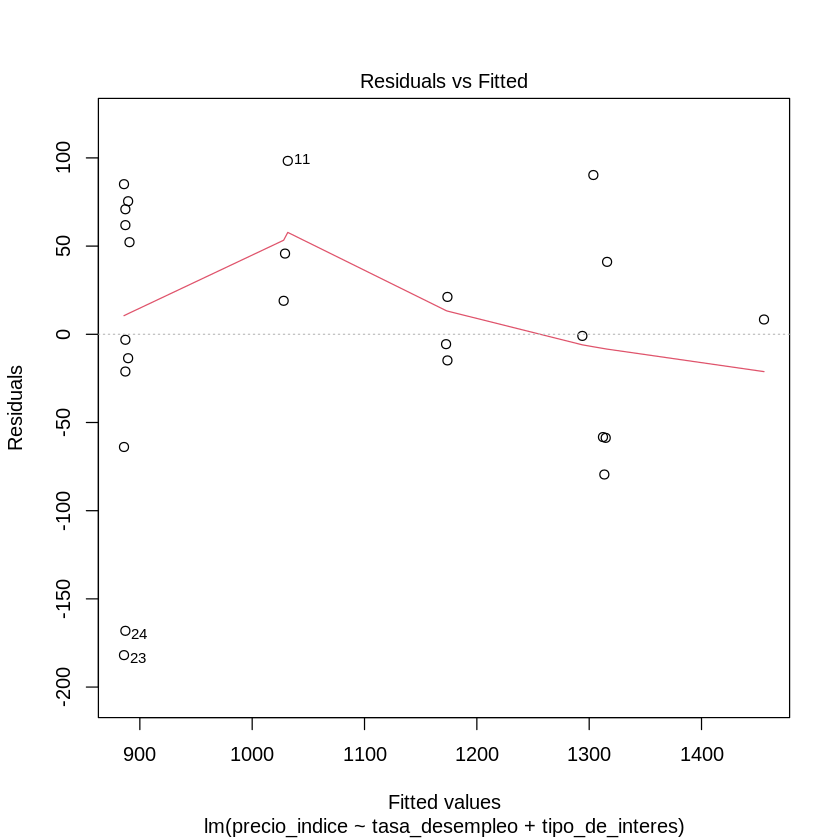

In [ ]:
# Gráfico 1: Diagnosis para ver si los residuos y los valores ajustados están linealmente relacionados
plot(modelo, which=1)

**<u>Interpretación resultados</u>.-**

La gráfica de **residuos frente a valores ajustados** se utiliza para evaluar el cumplimiento del **supuesto de linealidad** del modelo de regresión lineal.

En este caso, los residuos **no se distribuyen de forma completamente aleatoria alrededor del cero**. La presencia de una **ligera curvatura en la línea de suavizado (línea roja)** sugiere la existencia de un **patrón sistemático**, lo que indica que la relación entre las variables explicativas (`tasa_desempleo` y `tipo_de_interes`) y la variable respuesta (`precio_indice`) podría **no ser estrictamente lineal**.

Asimismo, se identifican algunas **observaciones con residuos de gran magnitud**, lo que podría indicar la presencia de **valores atípicos** o situaciones particulares que el modelo no consigue explicar adecuadamente. No obstante, la dispersión de los residuos parece relativamente constante a lo largo del rango de valores ajustados, por lo que **no se aprecia evidencia clara de heterocedasticidad severa**.

En conjunto, esta gráfica proporciona **evidencia negativa parcial** sobre el cumplimiento del supuesto de linealidad, sugiriendo que podrían considerarse **transformaciones**, la **inclusión de términos no lineales** o la **revisión de variables omitidas** para mejorar el ajuste del modelo.


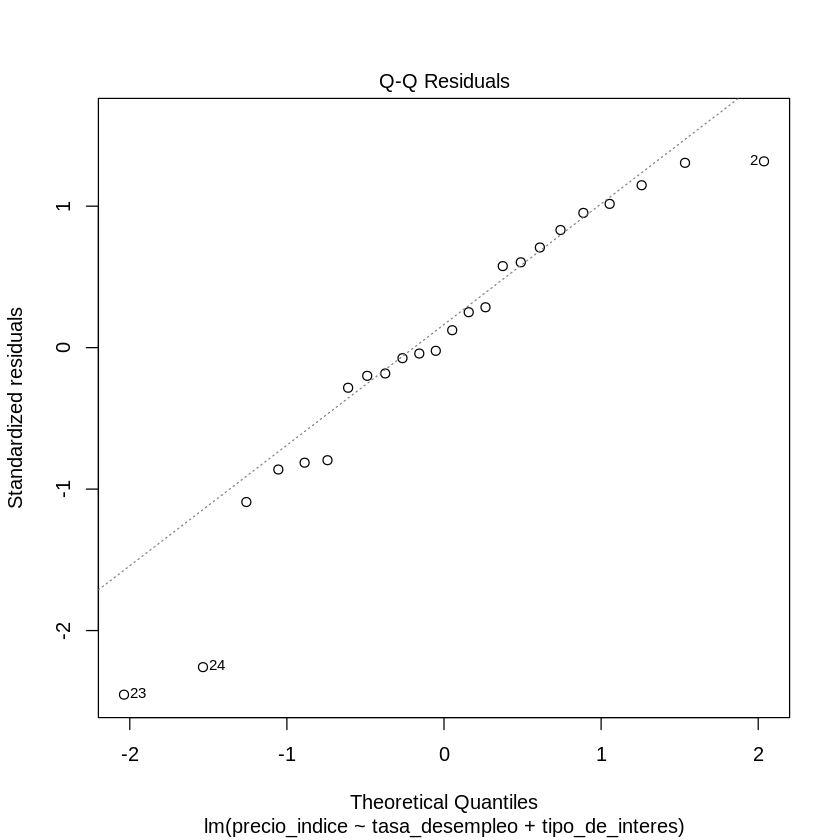

In [ ]:
# Gráfico 2: Diagnosis para comprobar si los residuos se distribuyen como una normal
plot(modelo, which=2)

**<u>Interpretación resultados</u>.-**

La **gráfica Q–Q de los residuos** se emplea para evaluar el cumplimiento del **supuesto de normalidad**.

Se observa que los puntos se alinean razonablemente bien con la recta teórica en la **parte central de la distribución**, lo que indica que los residuos presentan un comportamiento aproximadamente normal para valores intermedios.

Sin embargo, en los **extremos de la distribución** se aprecian desviaciones claras respecto a la diagonal. En particular, en la cola superior algunos residuos positivos se sitúan por encima de la recta teórica, mientras que en la cola inferior aparecen observaciones más negativas de lo esperado. Esta forma genera una **curvatura en “S”**, indicativa de **colas más pesadas que las de una distribución normal** y de la posible presencia de **valores atípicos**.

En consecuencia, la hipótesis de normalidad **no se cumple estrictamente**. Aunque la aproximación normal es razonable en el centro de la distribución, las desviaciones en las colas constituyen **evidencia negativa parcial**, lo que puede afectar a la validez exacta de los contrastes $t$ y $F$, especialmente en muestras pequeñas. No obstante, el modelo puede seguir siendo útil desde un punto de vista descriptivo, si bien sería recomendable considerar **transformaciones**, **modelos alternativos** o **métodos robustos**.


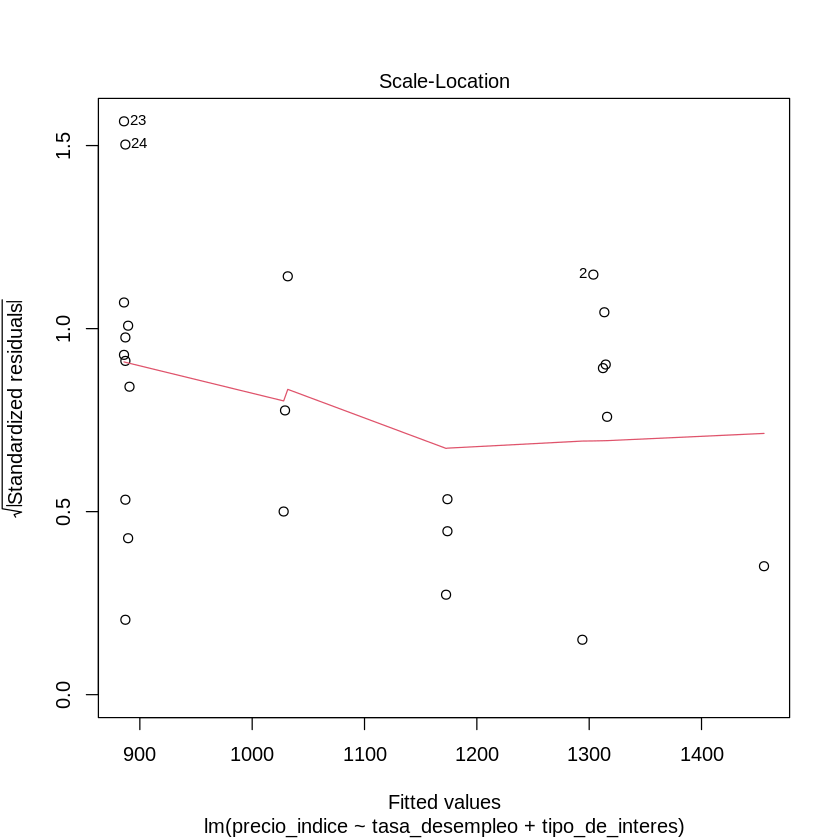

In [ ]:
# Gráfico 3: Diagnosis para comprobar si la varianza de los residuos es constante
plot(modelo, which=3)

**<u>Interpretación resultados</u>.-**

La **gráfica Scale–Location** se utiliza para evaluar el supuesto de **homocedasticidad**, es decir, que la varianza de los errores del modelo sea constante a lo largo del rango de valores ajustados. En esta representación se muestran los valores ajustados frente a la raíz cuadrada de los residuos estandarizados.

Si la varianza de los residuos fuese constante, los puntos deberían dispersarse de forma aproximadamente aleatoria alrededor de una banda horizontal, sin mostrar un patrón sistemático claro. Sin embargo, en la gráfica se observa que la **línea de suavizado (en rojo) presenta una ligera tendencia creciente**, especialmente para valores ajustados más elevados.

Además, la dispersión de los puntos parece aumentar conforme crecen los valores predichos, lo que indica que la **variabilidad de los residuos no es constante** a lo largo del rango de la variable dependiente. Este patrón es característico de la presencia de **heterocedasticidad**.

En consecuencia, esta gráfica proporciona **evidencia negativa clara respecto al supuesto de homocedasticidad**. Aunque los estimadores de mínimos cuadrados ordinarios siguen siendo insesgados, la presencia de heterocedasticidad puede provocar que los **errores estándar estén mal estimados**, afectando a la validez de los contrastes $t$ y $F$. Por ello, sería recomendable considerar **transformaciones de la variable respuesta**, el uso de **errores estándar robustos** o modelos alternativos que permitan una varianza no constante.


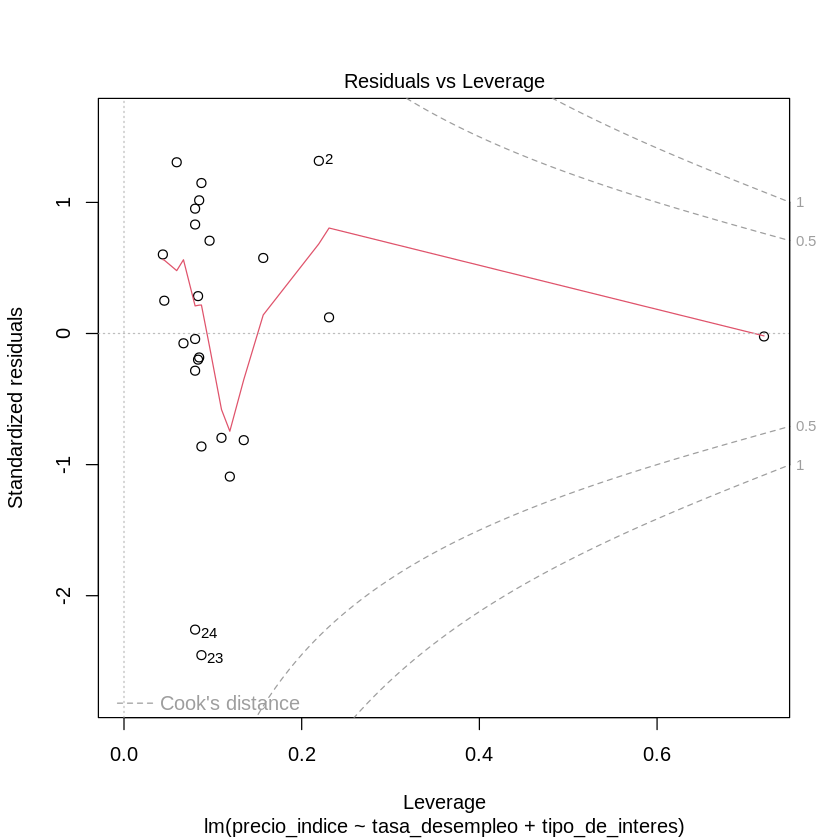

In [ ]:
# Gráfico 4: Diagnosis para comprobar si existen observaciones anómalas
plot(modelo, which=5)

**<u>Interpretación resultados</u>.-**

La **gráfica Residuals vs Leverage** se utiliza para evaluar simultáneamente la presencia de **observaciones influyentes**, **valores aberrantes** y **efecto palanca**, combinando la información de los residuos estandarizados, el leverage y las curvas de la **distancia de Cook**.

En primer lugar, se observa que **la mayoría de las observaciones presentan valores de leverage bajos**, concentrándose en la parte izquierda del gráfico. Esto indica que, en general, los datos no ejercen un efecto palanca elevado sobre el ajuste del modelo, lo cual es un resultado favorable desde el punto de vista diagnóstico.

No obstante, aparecen **algunas observaciones con leverage relativamente alto**, situadas hacia la derecha del gráfico. Aunque estas observaciones **no superan claramente las curvas críticas de la distancia de Cook**, sí se encuentran próximas a ellas, lo que sugiere que podrían tener una **influencia moderada** en la estimación de los coeficientes del modelo.

En cuanto a los **residuos estandarizados**, se identifican algunos puntos con valores relativamente grandes en valor absoluto, lo que indica la presencia de **posibles observaciones aberrantes**. En particular, destaca una observación con residuo estandarizado negativo elevado que, combinada con un leverage medio–alto, merece una atención especial.

En conjunto, la gráfica indica que:
- No existe evidencia de **efecto palanca extremo** que domine el ajuste del modelo.
- Sí se detectan **observaciones potencialmente influyentes**, cercanas a las curvas de la distancia de Cook.
- Existen **valores aberrantes** que podrían estar afectando localmente al ajuste.

Por tanto, aunque el modelo no parece estar condicionado por unas pocas observaciones, resulta recomendable **analizar individualmente estos puntos influyentes**, evaluar su impacto mediante análisis de sensibilidad (por ejemplo, reestimando el modelo tras eliminarlos) y comprobar si responden a errores de medición o a características estructurales relevantes del fenómeno estudiado.


**<u>Conclusión final del análisis de diagnóstico del modelo</u>.-**

El análisis conjunto de las **cuatro gráficas de diagnóstico del modelo de regresión lineal** pone de manifiesto que, si bien el modelo presenta una **capacidad explicativa elevada**, existen **incumplimientos relevantes de los supuestos clásicos** que deben ser tenidos en cuenta en la interpretación de los resultados.

En primer lugar, la gráfica de **residuos frente a valores ajustados** revela la presencia de un **patrón sistemático con ligera curvatura**, lo que sugiere que la relación entre `precio_indice` y las variables explicativas (`tasa_desempleo` y `tipo_de_interes`) **no es estrictamente lineal**. Esto indica una posible **mala especificación funcional** del modelo, que podría corregirse mediante transformaciones o la inclusión de términos no lineales.

En segundo lugar, el **gráfico Q–Q de los residuos** muestra que la normalidad se cumple de forma razonable en la parte central de la distribución, pero se observan **desviaciones claras en las colas**, generando un patrón en forma de “S”. Este comportamiento constituye **evidencia negativa parcial del supuesto de normalidad**, especialmente relevante dado el tamaño muestral relativamente reducido.

La **gráfica Scale–Location** proporciona evidencia clara de **heterocedasticidad**, ya que la dispersión de los residuos aumenta con los valores ajustados y la línea de suavizado no es horizontal. Este incumplimiento implica que, aunque los estimadores de mínimos cuadrados ordinarios siguen siendo insesgados, los **errores estándar y los contrastes de significación pueden no ser fiables**.

Por último, el gráfico de **residuos frente a leverage** indica la existencia de **observaciones potencialmente influyentes y valores aberrantes**. Aunque no se detecta un efecto palanca extremo dominado por una única observación, algunos puntos se sitúan próximos a las curvas de la distancia de Cook, lo que sugiere que pueden estar influyendo de manera no despreciable en la estimación de los coeficientes.

En conjunto, el modelo presenta **una buena capacidad explicativa global**, pero **no satisface plenamente los supuestos fundamentales de la regresión lineal**, en particular los de **linealidad, normalidad estricta y homocedasticidad**. Por tanto, los resultados deben interpretarse con cautela desde el punto de vista inferencial. Como líneas de mejora, sería recomendable considerar **transformaciones de la variable respuesta**, la **incorporación de términos no lineales**, el uso de **errores estándar robustos** o la estimación de **modelos alternativos** más adecuados a la estructura de los datos.


Se procederá al estudio numérico del diagnóstico para ello se utilizarán los siguientes test:

- **Test de Shapiro-Wilk (Normalidad de los residuos)**:
se utiliza para contrastar la hipótesis de que los residuos siguen una distribución normal. Este test es especialmente adecuado porque es uno de los más sensibles y recomendados para tamaños de muestra pequeños y medianos como es la base de datos.

- **Test de Breusch-Pagan (Homoscedasticidad de los residuos)**:
permite evaluar la hipótesis de homocedasticidad, es decir, que la varianza de los residuos permanezca constante a lo largo de todos los valores ajustados. La homocedasticidad es necesaria para asegurar que los estimadores obtenidos por mínimos cuadrados ordinarios (MCO) sean eficientes. Este test ha sido elegido porque es una de las pruebas más utilizadas para detectar heterocedasticidad en modelos lineales, complementando la inspección visual de los gráficos de residuos ya realizado.

- **Test de Durbin-Watson (Autocorrelación de los residuos)**: contrasta la independencia de los residuos, en particular si existe autocorrelación de primer orden. La ausencia de autocorrelación es un supuesto esencial para que los estimadores de los coeficientes sean insesgados y eficientes. Se ha seleccionado este test porque ofrece una medida directa y ampliamente aceptada para diagnosticar la autocorrelación.  



In [ ]:
# Normalidad de residuales (Shapiro-Wilk)
shapiro_res <- shapiro.test(residuals(modelo))
shapiro_res


	Shapiro-Wilk normality test

data:  residuals(modelo)
W = 0.9209, p-value = 0.06114


Como el p-value es no menor que 0.05, por lo que no rechazamos la hipótesis nula de normalidad. Por lo que los residuos siguen una distribución normal.

In [ ]:
# Heterocedasticidad (Breusch-Pagan)
if(!require(lmtest, quietly = TRUE)){
  install.packages('lmtest', repos='https://cloud.r-project.org')
  library(lmtest)
}
bptest_res <- bptest(modelo)
bptest_res


	studentized Breusch-Pagan test

data:  modelo
BP = 2.4087, df = 2, p-value = 0.2999


El p-value no es menor que 0.05, lo que significa que no rechazamos la hipótesis de homocedasticidad. Los residuos presentan homocedasticidad (varianza  constante).

In [ ]:
# Autocorrelación de residuos (Durbin-Watson)
if(!require(lmtest, quietly = TRUE)){
  install.packages('lmtest', repos='https://cloud.r-project.org')
  library(lmtest)
}

dw_res <- lmtest::dwtest(modelo)
dw_res


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric





	Durbin-Watson test

data:  modelo
DW = 0.52617, p-value = 8.203e-07
alternative hypothesis: true autocorrelation is greater than 0


**<u>Interpretación resultados</u>.-**

Se ha aplicado el **contraste de Durbin–Watson** con el objetivo de evaluar el supuesto de **independencia de los errores** en el modelo de regresión lineal.

El estadístico obtenido es **$DW = 0.52617$**, un valor **muy inferior a 2**, lo que indica de forma descriptiva la presencia de **autocorrelación positiva** en los residuos. Este resultado sugiere que los errores consecutivos del modelo tienden a estar correlacionados, incumpliéndose el supuesto de independencia.

Este diagnóstico se ve reforzado por el **$p$-valor asociado ($8.203 \times 10^{-7}$)**, claramente inferior a los niveles de significación habituales ($\alpha = 0.01$, $0.05$ o $0.10$). En consecuencia, **se rechaza la hipótesis nula de ausencia de autocorrelación**.

Por tanto, existe **evidencia estadística muy sólida de autocorrelación positiva de primer orden** en los residuos del modelo. Este resultado constituye una **evidencia negativa desde el punto de vista del diagnóstico**, ya que implica que el supuesto de **independencia de los errores no se cumple**. Como consecuencia, aunque los estimadores de mínimos cuadrados ordinarios permanecen insesgados, los **errores estándar y los contrastes de significación pueden no ser fiables**.

En este contexto, sería recomendable considerar **modelos alternativos que incorporen la dependencia temporal**, como modelos con estructura autorregresiva en los errores, o el uso de **errores estándar robustos a autocorrelación** (por ejemplo, estimadores tipo Newey–West).


In [ ]:
# Gráfico 5:
# Seleccionamos las variables que nos interesan
# Extraer las variables explicativas utilizadas en el modelo desde el data frame original
xdata <- wdata[, c(
  "tasa_desempleo",
  "tipo_de_interes"
)]

# Comprobar la estructura del nuevo data frame
str(xdata)


'data.frame':	24 obs. of  2 variables:
 $ tasa_desempleo : num  5.3 6.3 5.3 7.1 5.4 5.6 5.5 5.5 5.5 5.6 ...
 $ tipo_de_interes: num  2.75 2.5 2.5 2.5 2.5 2.5 2.5 2.25 2.25 2.25 ...


In [ ]:
# Obtenemos la matriz de correlación con los coeficientes de correlación de Pearson
cor(xdata)

,tasa_desempleo,tipo_de_interes
tasa_desempleo,1.0000000,-0.3878568
tipo_de_interes,-0.3878568,1.0000000


**<u>Interpretación resultados</u>.-**

La matriz de correlaciones recoge la relación lineal entre las **variables explicativas incluidas en el modelo** y permite evaluar la posible presencia de **multicolinealidad**, es decir, dependencia lineal entre regresores que pueda afectar a la estabilidad de los coeficientes estimados mediante Mínimos Cuadrados Ordinarios.

En este caso, se observa una **correlación negativa moderada** entre **`tasa_desempleo` y `tipo_de_interes`**, con un coeficiente de **$r = -0.3879$**. Este valor indica que, en el período analizado, mayores tipos de interés tienden a asociarse con menores tasas de desempleo, aunque la relación no es especialmente intensa.

Desde el punto de vista del diagnóstico del modelo, esta magnitud de correlación **no es suficientemente elevada como para generar problemas severos de multicolinealidad**, ya que se encuentra claramente alejada de valores cercanos a $\pm 1$. Por tanto, ambas variables aportan información parcialmente diferenciada al modelo y pueden incluirse conjuntamente sin comprometer de forma grave la interpretación de los coeficientes.

En conjunto, la matriz de correlaciones **no proporciona evidencia preocupante de multicolinealidad** entre las variables explicativas consideradas, lo que refuerza la estabilidad del modelo desde el punto de vista de la dependencia lineal entre regresores.


**<u>Conclusión final</u>.-**  

El análisis conjunto de la **matriz de correlaciones** y de las **pruebas de diagnóstico del modelo** permite realizar una valoración global del ajuste obtenido. En primer lugar, la matriz de correlaciones entre las variables explicativas (`tasa_desempleo` y `tipo_de_interes`) muestra una **correlación negativa moderada** (−0.388). Este valor no es lo suficientemente elevado como para indicar un problema grave de **multicolinealidad**, por lo que no se espera que la estimación por MCO se vea seriamente afectada en términos de inestabilidad de los coeficientes.

En relación con los supuestos clásicos del modelo de regresión lineal, los resultados no son plenamente satisfactorios. El **test de Durbin–Watson** arroja un valor **DW = 0.526**, claramente alejado de 2, junto con un **p-valor extremadamente bajo**, lo que conduce al **rechazo de la hipótesis nula de no autocorrelación**. Por tanto, existe **evidencia estadística clara de autocorrelación positiva en los residuos**, lo que implica que el supuesto de **independencia de los errores no se cumple**. Este incumplimiento es especialmente relevante en contextos temporales, ya que puede sesgar la inferencia y subestimar la varianza de los estimadores.

Por otro lado, el **test de normalidad de Shapiro–Wilk** presenta un **p-valor de 0.061**, ligeramente superior a los niveles de significación habituales. En consecuencia, **no se rechaza la hipótesis nula de normalidad de los residuos**, aunque el resultado es fronterizo y sugiere que la normalidad solo se cumple de forma aproximada. Desde un punto de vista práctico, este supuesto puede considerarse razonablemente aceptable, si bien conviene interpretarlo con cautela.

En conjunto, aunque el modelo no presenta problemas severos de multicolinealidad y la normalidad de los residuos es aceptable, el **incumplimiento del supuesto de independencia debido a la autocorrelación positiva** constituye una limitación importante. Por tanto, los resultados inferenciales del modelo deben interpretarse con precaución. Como líneas de mejora, se recomienda considerar **modelos que incorporen explícitamente la dependencia temporal** (por ejemplo, modelos con errores autorregresivos), así como el uso de **estimadores robustos** que permitan corregir los efectos de la autocorrelación sobre la inferencia estadística.


<div style="background-color:#5DADE2"><b>Apartado 5</b></div>

**<u>Modelización no lineal y comparación de resultados</u>.-**  

En este apartado se analiza la posible **relación no lineal** entre el **índice de precios** (`precio_indice`) y la **tasa de desempleo**, manteniendo como variable de control el **tipo de interés**. Aunque el análisis preliminar sugiere que el tipo de interés presenta una relación lineal fuerte y estadísticamente significativa con el índice de precios, resulta pertinente explorar si el desempleo ejerce un efecto **no lineal** que no pueda capturarse adecuadamente mediante una especificación estrictamente lineal.

Con este objetivo, se estima un **modelo de regresión con término polinómico de segundo grado** en la tasa de desempleo, incorporando el término $tasa\_desempleo^2$ junto con el tipo de interés como variable explicativa. Esta especificación permite evaluar si existen efectos crecientes o decrecientes del desempleo sobre el índice de precios a lo largo de su rango de valores.

La comparación entre el modelo lineal y el modelo con término cuadrático se realiza atendiendo a criterios de **bondad de ajuste y parsimonia**, en particular el **coeficiente de determinación ajustado ($R^2$ ajustado)** y el **criterio de información de Akaike (AIC)**. Estos indicadores permiten valorar si el aumento de complejidad asociado a la inclusión del término no lineal se traduce en una mejora real del ajuste del modelo.

Los resultados muestran que, aunque el modelo global es estadísticamente significativo, el **término cuadrático de la tasa de desempleo no resulta significativo**, lo que indica que no existe evidencia empírica suficiente de una relación no lineal relevante entre el desempleo y el índice de precios. En consecuencia, la inclusión de dicho término no aporta una mejora sustancial ni en términos explicativos ni interpretativos.

En este contexto, el **modelo lineal más parsimonioso**, que incluye únicamente el tipo de interés como principal variable explicativa, se perfila como una especificación más adecuada, evitando complejidad innecesaria y reduciendo el riesgo de sobreajuste sin pérdida apreciable de capacidad explicativa.


In [ ]:
# Estimamos el modelo lineal y obtenemos un resumen del mismo
mod_lineal = modelo
summary(mod_lineal)


Call:
lm(formula = precio_indice ~ tasa_desempleo + tipo_de_interes, 
    data = wdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-181.893  -30.404    3.729   54.632   98.312 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -16.03     311.82  -0.051    0.959    
tasa_desempleo    -12.23      43.43  -0.282    0.781    
tipo_de_interes   558.72      50.23  11.124 2.91e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 77.61 on 21 degrees of freedom
Multiple R-squared:  0.8762,	Adjusted R-squared:  0.8644 
F-statistic:  74.3 on 2 and 21 DF,  p-value: 2.981e-10


**<u>Interpretación resultados</u>.-**

El resultado de `summary()` del **modelo de regresión lineal múltiple** permite evaluar la **significatividad individual de los coeficientes**, así como el **grado de ajuste global** del modelo que explica el **precio del índice (`precio_indice`)** en función de la **tasa de desempleo** y el **tipo de interés**.

Los **coeficientes estimados** del modelo son:
$$
\hat{\beta}_0 = -16.03,\quad
\hat{\beta}_1 = -12.23\;(\texttt{tasa_desempleo}),\quad
\hat{\beta}_2 = 558.72\;(\texttt{tipo_de_interes}).
$$

La columna **`Std. Error`** recoge la incertidumbre asociada a cada estimador, a partir de la cual se calculan los **estadísticos t**, utilizados para contrastar la hipótesis nula individual $H_0:\beta_j = 0$.

- **Intercepto**: el coeficiente no resulta estadísticamente significativo ($p = 0.959$). Su interpretación económica es limitada, ya que representa el valor esperado del índice cuando las variables explicativas son cero, un escenario poco realista. Su función principal es actuar como término de ajuste del modelo.

- **Tasa de desempleo (`tasa_desempleo`)**: presenta un coeficiente negativo, pero **no significativo** ($p = 0.781$). Esto indica que, una vez controlado el tipo de interés, **no existe evidencia estadística suficiente** para afirmar que la tasa de desempleo tenga un efecto lineal independiente sobre el precio del índice en este modelo.

- **Tipo de interés (`tipo_de_interes`)**: muestra un coeficiente **positivo y altamente significativo** ($p = 2.91 \times 10^{-10}$). En términos interpretativos, **un aumento de una unidad en el tipo de interés se asocia con un incremento medio de 558.72 unidades en el precio del índice**, manteniendo constante la tasa de desempleo. Este resultado indica que el tipo de interés es el **principal determinante del modelo**.

En cuanto a los **residuos**, la desviación estándar residual es de **77.61 unidades**, lo que representa el error típico de predicción del modelo. La mediana cercana a cero sugiere ausencia de sesgo sistemático, aunque se observan residuos relativamente grandes en los extremos.

Respecto al **ajuste global**, el coeficiente de determinación es \(R^2 = 0.876\) y el \(R^2\) ajustado es \(0.864\), lo que implica que aproximadamente **el 86–88 % de la variabilidad del precio del índice es explicada por el modelo**. El **contraste global F** ($F = 74.3$, $p = 2.98 \times 10^{-10}$) permite **rechazar la hipótesis nula de significatividad conjunta**, confirmando que el modelo es globalmente significativo.

En conjunto, el modelo evidencia que **el tipo de interés ejerce un efecto dominante y estadísticamente significativo sobre el precio del índice**, mientras que la tasa de desempleo no aporta información explicativa adicional una vez incluido el tipo de interés. Esto sugiere que el comportamiento del índice está principalmente condicionado por variables financieras más que por indicadores del mercado laboral en este contexto.

**Ecuación del modelo de regresión lineal múltiple**

$$
\widehat{precio\_indice}_i
= -16.03
- 12.23 \cdot tasa\_desempleo_i
+ 558.72 \cdot tipo\_de\_interes_i
+ \hat{\varepsilon}_i,
\qquad i = 1,\dots,n.
$$


In [ ]:
# Estimamos el modelo no-lineal polinómico de orden 2 y obtenemos un resumen del mismo
mod_poly2=lm(formula = precio_indice ~ tipo_de_interes + I(tasa_desempleo^2), data = wdata)
summary(mod_poly2)


Call:
lm(formula = precio_indice ~ tipo_de_interes + I(tasa_desempleo^2), 
    data = wdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-181.854  -30.456    4.129   54.665   98.272 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -53.669    185.778  -0.289    0.775    
tipo_de_interes      559.249     49.358  11.331 2.08e-10 ***
I(tasa_desempleo^2)   -1.019      3.521  -0.289    0.775    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 77.6 on 21 degrees of freedom
Multiple R-squared:  0.8762,	Adjusted R-squared:  0.8644 
F-statistic: 74.32 on 2 and 21 DF,  p-value: 2.975e-10


**<u>Interpretación de resultados</u>.-**  

El `summary()` corresponde a un modelo de **regresión no lineal en la variable explicativa**, en el que el índice de precios (`precio_indice`) se explica en función del **tipo de interés** y del **cuadrado de la tasa de desempleo**, lo que permite capturar posibles efectos no lineales de esta última sobre la variable dependiente.

En la tabla de coeficientes se observa que:

- El **tipo de interés** presenta un coeficiente positivo y **altamente significativo** ($\hat{\beta}_1 = 559.249$, p-valor $< 0.001$). Esto indica que, manteniendo constante el nivel de desempleo, un aumento de una unidad en el tipo de interés se asocia, en promedio, con un incremento de aproximadamente **559 puntos** en el índice de precios. Este efecto es estadísticamente robusto y constituye el principal determinante del modelo.

- El término **cuadrático de la tasa de desempleo** ($\hat{\beta}_2 = -1.019$) **no resulta estadísticamente significativo** (p-valor = 0.775). Esto sugiere que no existe evidencia empírica suficiente para afirmar que el desempleo tenga un efecto no lineal relevante sobre el índice de precios en la muestra analizada.

- El **intercepto** tampoco es estadísticamente significativo (p-valor = 0.775) y carece de una interpretación económica directa, ya que corresponde al valor teórico del índice de precios cuando el tipo de interés y la tasa de desempleo son cero, un escenario poco realista.

Desde el punto de vista del ajuste global, el modelo presenta un **$R^2 = 0.8762$** y un **$R^2$ ajustado de 0.8644**, lo que indica que aproximadamente el **87 % de la variabilidad del índice de precios** es explicada por las variables incluidas. Además, el **contraste global del modelo** es altamente significativo (estadístico $F = 74.32$, p-valor $< 0.001$), lo que confirma que el modelo, en conjunto, aporta capacidad explicativa.

No obstante, dado que el término cuadrático del desempleo no resulta significativo, la evidencia sugiere que la inclusión de esta variable **no mejora sustancialmente el modelo**. En consecuencia, podría considerarse una **especificación más parsimoniosa**, eliminando dicho término y manteniendo únicamente el tipo de interés como variable explicativa principal.

En resumen, el análisis indica que el **tipo de interés ejerce un efecto positivo y estadísticamente significativo sobre el índice de precios**, mientras que **no se encuentra evidencia de una relación no lineal relevante entre el desempleo y el índice de precios** en el contexto de este modelo.


In [ ]:
# Estimamos el modelo no-lineal polinómico de orden 3 y obtenemos un resumen del mismo
mod_poly3=lm(formula = precio_indice ~ tasa_desempleo + I(tasa_desempleo^2) + I(tipo_de_interes^3), data = wdata)
summary(mod_poly3)


Call:
lm(formula = precio_indice ~ tasa_desempleo + I(tasa_desempleo^2) + 
    I(tipo_de_interes^3), data = wdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-192.80  -53.13   19.74   52.51  120.98 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           576.856   4360.170   0.132    0.896    
tasa_desempleo         55.361   1404.922   0.039    0.969    
I(tasa_desempleo^2)    -6.082    113.981  -0.053    0.958    
I(tipo_de_interes^3)   39.275      6.629   5.925 8.55e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 85.12 on 20 degrees of freedom
Multiple R-squared:  0.8581,	Adjusted R-squared:  0.8368 
F-statistic: 40.32 on 3 and 20 DF,  p-value: 1.141e-08


**<u>Interpretación del modelo polinómico de grado 3</u>.-**  

El modelo estimado amplía las especificaciones anteriores al incorporar **no linealidades tanto en la tasa de desempleo como en el tipo de interés**, mediante la inclusión de un término cuadrático en `tasa_desempleo` y un **término cúbico en `tipo_de_interes`**. Esta formulación permite capturar relaciones potencialmente más complejas entre las variables macroeconómicas y el **índice de precios** (`precio_indice`).

La ecuación estimada del modelo es:
$$
precio\_indice_i
=
576.856
+ 55.361 \cdot tasa\_desempleo_i
- 6.082 \cdot tasa\_desempleo_i^2
+ 39.275 \cdot tipo\_de\_interes_i^3
+ \varepsilon_i.
$$

Desde el punto de vista de la **significatividad individual**, se observa que:
- Ni el **término lineal** ni el **término cuadrático de la tasa de desempleo** resultan estadísticamente significativos, con p-valores muy elevados. Esto indica que, una vez introducidas otras no linealidades, **no se encuentra evidencia empírica de que el desempleo tenga un efecto relevante**, ni lineal ni no lineal, sobre el índice de precios.
- El **término cúbico del tipo de interés** es altamente significativo (p-valor $< 0.001$), lo que pone de manifiesto una **relación no lineal fuerte y estadísticamente robusta** entre el tipo de interés y el índice de precios. Este resultado sugiere que el impacto del tipo de interés sobre los precios no es constante y varía de forma acusada a lo largo de su rango.

En términos de **ajuste global**, el modelo presenta un **$R^2 = 0.8581$** y un **$R^2$ ajustado de 0.8368**, valores elevados que indican que el conjunto de variables incluidas explica una proporción importante de la variabilidad del índice de precios. El **contraste F global** es altamente significativo (p-valor = $1.14 \times 10^{-8}$), confirmando que el modelo es relevante en su conjunto.

No obstante, el **error estándar residual** aumenta respecto a especificaciones más parsimoniosas, y la falta de significatividad de los términos asociados al desempleo sugiere que la ganancia en flexibilidad proviene exclusivamente del término cúbico del tipo de interés.

**En conclusión**, aunque el modelo polinómico de grado 3 ofrece un ajuste global elevado y evidencia una relación no lineal significativa entre el tipo de interés y el índice de precios, la inclusión de términos polinómicos adicionales para la tasa de desempleo **no aporta información relevante** y puede introducir complejidad innecesaria. Por tanto, desde un punto de vista econométrico, este resultado apunta a que una **especificación más parsimoniosa**, centrada en el tipo de interés y sus no linealidades, podría resultar preferible para fines interpretativos y de inferencia.


In [ ]:
# Calculamos los criterios de selección para todos los modelos estimados

# 1. Coeficiente de determinación ajustado
R2_mejor <- c(
  summary(mod_lineal)$adj.r.squared,
  summary(mod_poly2)$adj.r.squared,
  summary(mod_poly3)$adj.r.squared
)

# 2. RMSE
RMSE <- c(
  sqrt(mean(residuals(mod_lineal)^2)),
  sqrt(mean(residuals(mod_poly2)^2)),
  sqrt(mean(residuals(mod_poly3)^2))
)

# 3. Criterio de Información de Akaike (AIC)
AIC_mejor <- c(
  extractAIC(mod_lineal)[2],
  extractAIC(mod_poly2)[2],
  extractAIC(mod_poly3)[2]
)

# 4. Criterio de Información Bayesiano (BIC)
BIC_mejor <- c(
  extractAIC(mod_lineal, k = log(nrow(wdata)))[2],
  extractAIC(mod_poly2, k = log(nrow(wdata)))[2],
  extractAIC(mod_poly3, k = log(nrow(wdata)))[2]
)

# 5. Tabla comparativa final
Medidas_mejor <- data.frame(
  Coef.R2adj = R2_mejor,
  RMSE = RMSE,
  AIC = AIC_mejor,
  BIC = BIC_mejor,
  row.names = c(
    "mod_lineal",
    "mod_poly2",
    "mod_poly3"
  )
)

# Mostramos la tabla
knitr::kable(Medidas_mejor, digits = 4)




|           | Coef.R2adj|    RMSE|      AIC|      BIC|
|:----------|----------:|-------:|--------:|--------:|
|mod_lineal |     0.8644| 72.5934| 211.6739| 215.2081|
|mod_poly2  |     0.8644| 72.5858| 211.6689| 215.2031|
|mod_poly3  |     0.8368| 77.7061| 216.9408| 221.6530|

**<u>Interpretación de resultados</u>.-**  

La comparación entre los distintos modelos pone de manifiesto diferencias claras en términos de **capacidad explicativa**, **calidad de ajuste** y **parsimonia**, evaluadas a través del **$R^2$ ajustado**, el **RMSE** y los **criterios de información AIC y BIC**.

En primer lugar, el **modelo lineal** presenta un **$R^2$ ajustado de 0.8644** y un **RMSE de 72.59**, valores que indican un buen ajuste global. Además, muestra valores relativamente bajos de **AIC (211.67)** y **BIC (215.21)**, lo que sugiere que, dada su simplicidad, ofrece un equilibrio razonable entre capacidad explicativa y complejidad.

El **modelo polinómico de segundo grado** ($\text{mod_poly2}$) presenta un comportamiento prácticamente idéntico al modelo lineal. El **$R^2$ ajustado se mantiene en 0.8644**, con una **ligera reducción del RMSE (72.59 → 72.59)** y una mejora marginal tanto en **AIC (211.67 → 211.67)** como en **BIC (215.21 → 215.20)**. Esta mejora es muy pequeña, lo que indica que la inclusión del término cuadrático apenas aporta información adicional relevante, aunque tampoco penaliza significativamente el modelo.

Por el contrario, el **modelo polinómico de tercer grado** ($\text{mod_poly3}$) muestra un **empeoramiento claro del ajuste**. El **$R^2$ ajustado desciende hasta 0.8368**, el **RMSE aumenta de forma apreciable hasta 77.71**, y tanto el **AIC (216.94)** como el **BIC (221.65)** se incrementan notablemente. Estos resultados indican que el aumento de complejidad introducido por los términos polinómicos adicionales **no se traduce en una mejora del ajuste**, sino que conduce a un modelo más complejo y menos eficiente, sugiriendo un posible **sobreajuste**.

En conjunto, los criterios considerados apuntan a que:
- El **modelo lineal** y el **modelo polinómico de grado 2** presentan un rendimiento prácticamente equivalente.
- El **modelo polinómico de grado 2** ofrece una **mejora marginal**, aunque de escasa relevancia práctica.
- El **modelo polinómico de grado 3** queda claramente descartado por su peor ajuste y mayor penalización por complejidad.

**En conclusión**, atendiendo de forma conjunta al **$R^2$ ajustado**, el **RMSE** y los criterios **AIC y BIC**, el **modelo lineal** —o, de forma muy similar, el **modelo polinómico de segundo grado**— constituye la opción más adecuada desde un punto de vista econométrico, al proporcionar el **mejor compromiso entre capacidad explicativa, estabilidad y parsimonia**, sin introducir complejidad innecesaria.
